In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Inference :

Wine Type spans three classes with high dispersion (mean 1.94, std 0.78), highlighting substantial chemical diversity across groups.

Alcohol content is tightly regulated (mean 13.00, std 0.81), indicating consistent fermentation practices.

Malic acid shows strong variability (mean 2.33, std 1.12), making it a major contributor to acidity-driven differentiation.

Ash exhibits minimal variability (std 0.27), suggesting low discriminative capability.

Alcalinity of ash demonstrates wide spread (std 3.34), marking it as a high-impact feature for class separation.

Magnesium levels vary considerably (std 14.28), reflecting vineyard-soil mineral differences.

Total phenols show meaningful variance (std 0.63), reinforcing their role in defining wine structure.

Flavanoids display high spread (std 1.00), making them influential for clustering and PCA loadings.

Non-flavanoid phenols are narrowly distributed (std 0.12), providing limited separation power.

Proanthocyanidins vary moderately (mean 1.59, std 0.57), contributing to tannin and bitterness characteristics.

Color intensity ranges widely (1.28–13.00), ensuring strong influence in dimensionality reduction.

Hue remains stable (std 0.22), limiting its discriminative utility.

Dilution ratio shows significant spread (std 0.71), reflecting variation in pigment concentration.

Proline exhibits extreme variance (std 314.9), making it the most dominant biochemical marker for distinguishing wine types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# Inference:

The dataset contains 178 observations across 14 features, providing a sufficiently rich sample size for PCA and clustering workflows.

There are no missing values in any column (178 non-null each), ensuring uninterrupted downstream analysis without imputation requirements.

The feature set comprises 11 continuous float variables and 3 integer variables, confirming that the dataset is predominantly numerical and fully compatible with PCA.

The Type column is categorical (int64 encoded), functioning as the class label for supervised validation but excluded from PCA transformation.

Magnesium and Proline are stored as integers, likely reflecting discrete biochemical measurements, but can still be standardized with continuous features.


The dataset structure is clean, consistent, and analysis-ready, requiring no preprocessing beyond scaling for PCA and normalization for clustering.

In [5]:
(df==0).sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# Inferece :
No zeros found in dataset

In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# Inference :
No Nulll values found

# PLots :

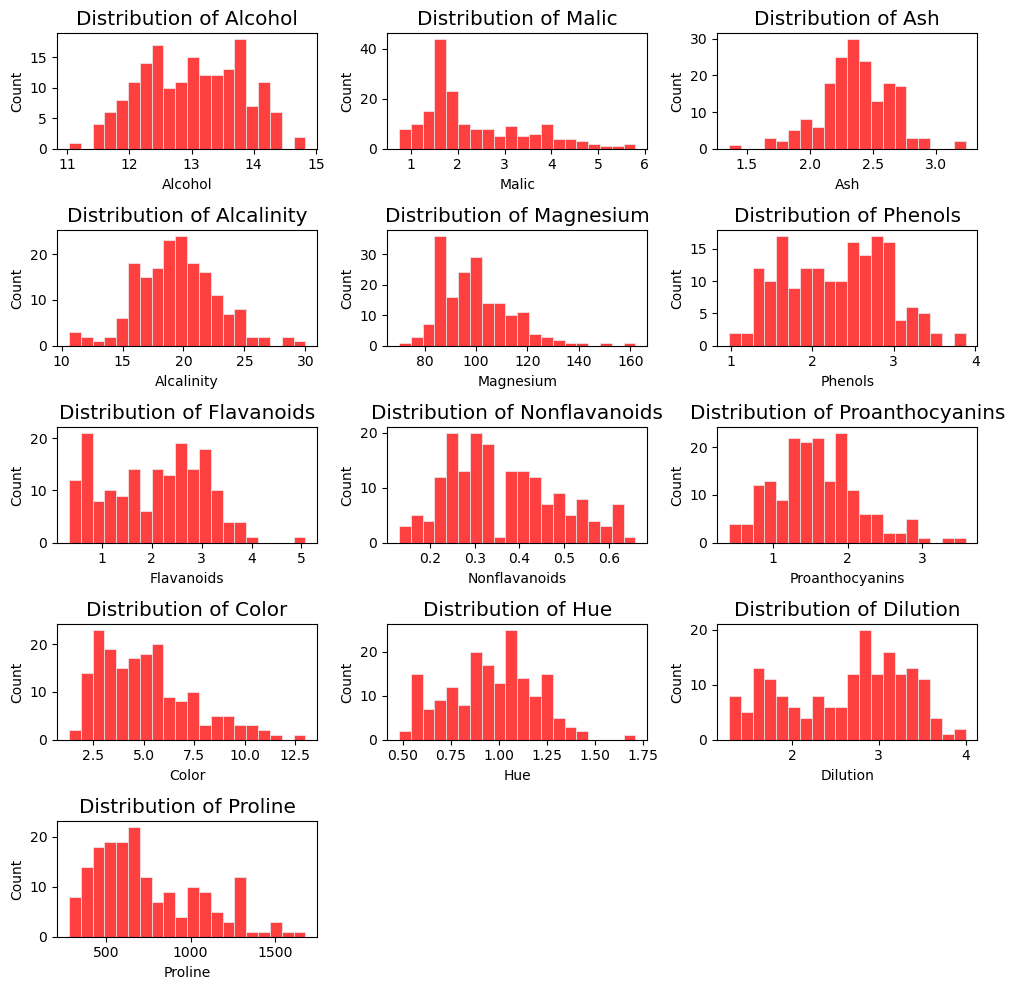

In [ ]:
# 1.Histoplot :

df_cols=df.drop(columns="Type",axis=1)
cols=df_cols.columns
fig,axes=plt.subplots(5,3,figsize=(10,10))
axes=axes.flatten()
plt.style.use("ggplot")
for i,col in enumerate(cols):
    sns.histplot(data=df[col],color="red",bins=20,ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

fig.delaxes(axes[-1])    
fig.delaxes(axes[-2])

plt.tight_layout()
plt.savefig("Histogram.jpeg", dpi=300)
plt.show()

# Inference : 

1.Alcohol shows a roughly symmetric distribution with mild spread, indicating moderate variability and no extreme outliers.

2.Malic acid is right-skewed, suggesting many wines have low malic levels while a few contain substantially higher acidity.

3.Ash displays a tight, nearly normal distribution, confirming low variability and limited discriminative power.

4.Alcalinity exhibits a broad, right-tailed distribution, implying significant chemical variation across wine types.

5.Magnesium is right-skewed with a long tail, indicating a minority of samples contain unusually high mineral content.

6.Phenols show moderate spread with a slight right skew, reflecting meaningful diversity in phenolic concentration.

7.Flavanoids appear multimodal, hinting at underlying class separation and strong contribution to clustering/PCA.

8.Non-flavanoid phenols form a narrow, symmetric distribution, highlighting their minimal influence on classification.

9.Proanthocyanidins display moderate right skew, suggesting variation in tannin-related compounds across wines.

10.Color intensity is heavily right-skewed, indicating a few intensely colored wines while most have moderate pigment levels.

11.Hue shows moderate spread without extreme outliers, reflecting stable color tone across samples.

12.Dilution ratio forms a wide distribution, capturing significant diversity in anthocyanin absorbance and pigment content.

13.Proline is strongly right-skewed with a long tail, making it a major driver of class separation due to extreme biochemical variation.

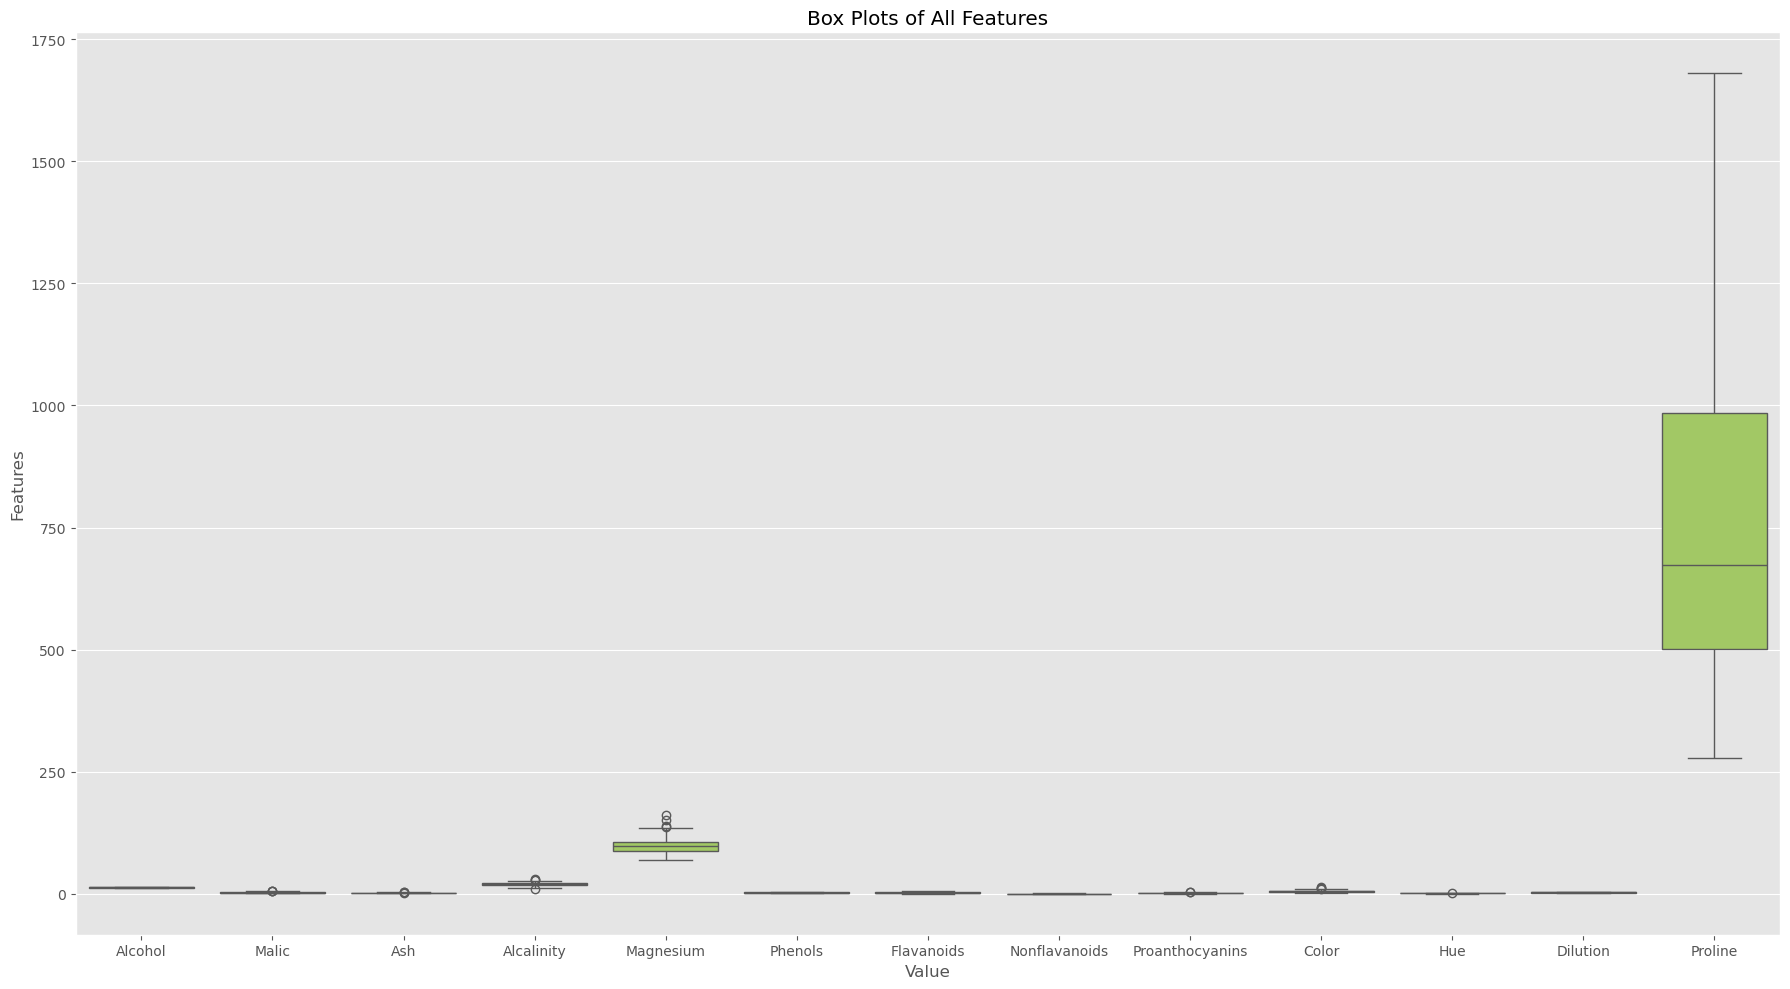

<Figure size 640x480 with 0 Axes>

In [ ]:
# Box plot
df_cols=df.drop(columns="Type",axis=1)
cols=df_cols.columns
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_cols, orient="v", palette="Set2")
plt.title("Box Plots of All Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
plt.savefig("Boxplot.jpeg", dpi=300)

# Inference :

1.Alcohol shows a relatively tight interquartile range (IQR) with few mild outliers, indicating controlled variability across wine samples.

2.Malic acid displays a wide IQR and multiple high-end outliers, confirming strong right-skewness and substantial chemical variation in wine acidity.

3.Ash exhibits a narrow IQR with minimal outliers, suggesting stable mineral composition and low discriminative power.

4.Alcalinity of ash contains several outliers and a wider spread, indicating notable variability across wine types and stronger clustering influence.

5.Magnesium levels show many right-side outliers, highlighting significant differences in vineyard soil mineralization.

6.Phenols have moderate spread with few outliers, reflecting balanced but meaningful variation in phenolic structure.

7.Flavanoids display one of the widest spreads with several extreme values, reinforcing their strong contribution to class separation.

8.Non-flavanoid phenols have a very tight distribution with almost no outliers, confirming limited variance and weak impact on PCA.

9.Proanthocyanidins show moderate variability and occasional outliers, aligning with expected diversity in tannin-related compounds.

10.Color intensity demonstrates a large number of high-value outliers, consistent with its heavy right-skew observed in histograms.

11.Hue displays a small IQR with minimal outliers, indicating a stable, consistent color tone across wines.

12.Dilution ratio shows moderate variability with some outliers, reflecting differences in anthocyanin concentration and absorbance.

13.Proline exhibits extreme outliers on the higher end, validating it as the most variable and discriminative biochemical feature in the dataset.

In [9]:
# correlation :
df_corr=df_cols.corr()
df_corr

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


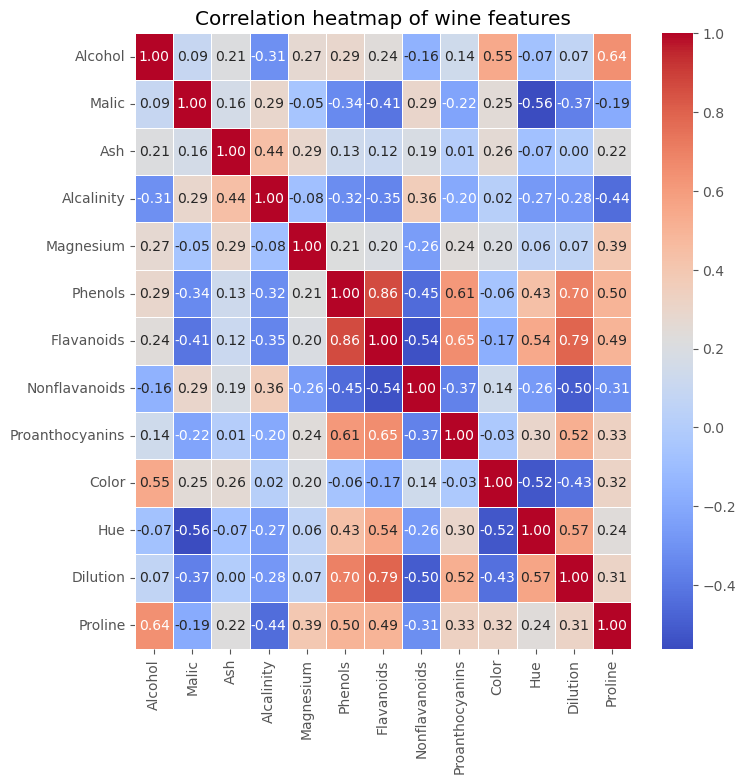

In [10]:
# C orrelation Heatmap :

plt.figure(figsize=(8,8))
sns.heatmap(data=df_corr,annot=True,cmap="coolwarm",linewidth=0.5,fmt="0.2f")
plt.title("Correlation heatmap of wine features")
plt.savefig("F:/EXCELR/Assignments/14_PCA_Assignment/Corr_heatmap.jpeg", dpi=300)
plt.show()


# Inference :

Phenols and Flavanoids show a very strong positive correlation (0.86), confirming that flavonoid content is the primary driver of total phenolic richness in wines.

Flavanoids and Dilution exhibit a strong correlation (0.79), indicating that wines richer in flavonoids have stronger absorbance and deeper color intensity.

Phenols and Dilution also correlate strongly (0.70), reinforcing that phenolics contribute significantly to wine body, viscosity, and color density.

Alcohol and Proline display a high positive correlation (0.64), suggesting that wines with higher alcohol content tend to be richer and more complex in amino acid profile.

Alcohol and Color intensity correlate moderately (0.55), meaning deeper-colored wines often have higher alcohol content.

Hue and Malic acid show a strong negative correlation (–0.56), implying that acidity strongly affects wine color tone, shifting it towards redder hues.

Color intensity and Hue are strongly negatively correlated (–0.52), indicating that darker wines typically have lower hue values (deeper red/purple rather than yellowish tones).

Nonflavanoids show strong negative correlations with both Phenols (–0.45) and Flavanoids (–0.54), confirming they represent an opposing phenolic subclass with a different chemical profile.

Proanthocyanidins are highly correlated with Flavanoids (0.65) and Phenols (0.61), linking tannin structure to total phenolic composition.

Malic acid shows moderate negative correlations with wine quality indicators such as Phenols (–0.34), Flavanoids (–0.41), and Dilution (–0.37), reinforcing its association with harsher acidity and lower smoothness.

Alcalinity correlates negatively with quality-related features (Flavanoids –0.35, Phenols –0.32, Dilution –0.28), suggesting wines with higher alkalinity tend to have lower phenolic richness.

Proline correlates moderately with Magnesium (0.39), indicating subtle influence of mineral content on amino acid accumulation.

Color intensity has meaningful correlations with Alcohol (0.55), Proline (0.32), and Phenols (–0.06), showing that pigmentation is multi-factorial and tied to multiple chemical pathways.

The correlation structure shows strong multicollinearity among phenolic and color-related compounds, positioning them as dominant drivers for PCA and cluster separation, while acidity and hue behave as counterbalancing factors.

# Dimensionality Reduction with PCA

In [11]:
# Standardise the data by standard scaler
from sklearn.preprocessing import StandardScaler

In [12]:
SS=StandardScaler()
df_Scaled=SS.fit_transform(df_cols)# input all columns except Type col
df_Scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
# PCA
from sklearn.decomposition import PCA

In [14]:
# Apply PCA without (to inspect variance)

pca=PCA()
df_SPCA=pca.fit_transform(df_Scaled)
df_SPCA
df_SPCA.shape


(178, 13)

In [15]:
df_PCA=pd.DataFrame(df_SPCA,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
df_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,0.299822,0.339821,-0.021866


In [16]:
# Varainve expalined by PCA
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

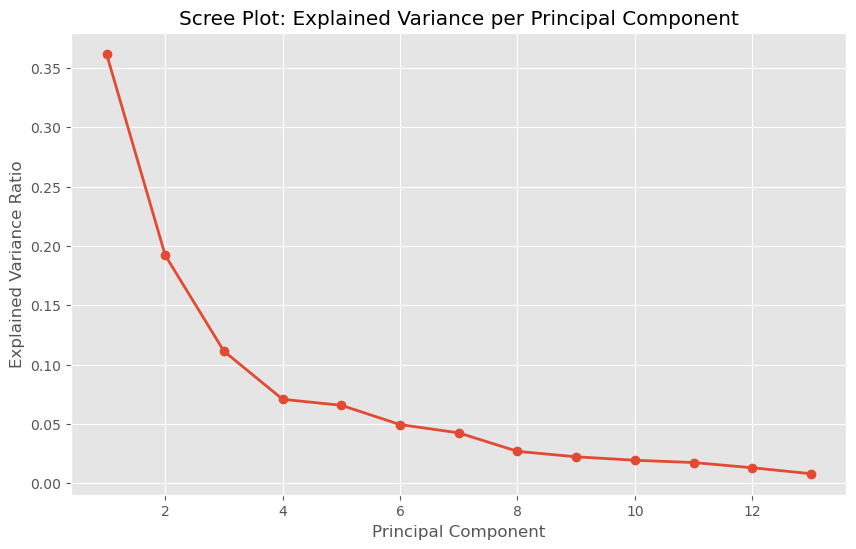

In [ ]:
# Scree Plot (Explained Variance per Component)

import matplotlib.pyplot as plt

explained = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained) + 1),
         explained,
         marker='o',
         linestyle='-',
         linewidth=2)
plt.title("Scree Plot: Explained Variance per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.savefig("scree_plot.jpeg", dpi=300)
plt.show()


# Inference :

PC1 explains 36.20% variance, indicating it captures the strongest structural differences in wine chemistry.

PC2 explains 19.21% variance, showing acidity- and alcalinity-related features form the second major variance axis.

PC3 explains 11.12% variance, contributing to phenolic–tannin structure variation.

PC4 explains 7.07% variance, capturing moderate secondary chemical variation.

PC5 explains 6.56% variance, helping reach an 80% cumulative variance threshold.

PC6 explains 4.94% variance, marking the beginning of diminishing returns.

PC7 explains 4.24% variance, reinforcing that remaining components describe minor variance patterns.

PC8 explains 2.68% variance, showing very limited additional information.

PC9 explains 2.22% variance, confirming insignificance beyond PC7.

PC10 explains 1.93% variance, indicating noise-level contribution.

PC11 explains 1.74% variance, adding negligible structural meaning.

PC12 explains 1.30% variance, contributing minimal variance.

PC13 explains 0.79% variance, confirming near-zero impact.


The Scree Plot shows a clear elbow at PC3, with PC1–PC3 explaining ~66.5% of variance, establishing them as the optimal dimensionality for PCA-driven clustering.

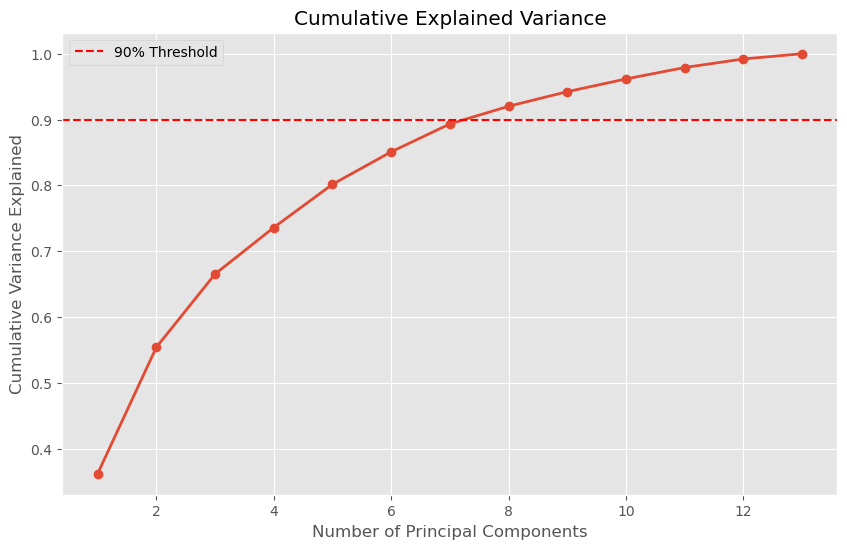

In [ ]:
# Cumulative Explained Variance Plot
cum_var = explained.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1),
         cum_var,
         marker='o',
         linestyle='-',
         linewidth=2)
plt.axhline(0.90, color='red', linestyle='--', label='90% Threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.legend()
plt.grid(True)
plt.savefig("Cumulative Variance_plot.jpeg", dpi=300)
plt.show()



# Inference : 

PC1 captures 36.20% cumulative variance, forming the strongest explanatory axis in the dataset.

PC1–PC2 capture 55.41% cumulative variance, crossing the 50% structure retention threshold.

PC1–PC3 capture 66.53% cumulative variance, marking the clear elbow point where variance contributions begin flattening.

PC1–PC4 capture 73.60% cumulative variance, providing substantial dimensionality reduction with strong information retention.

PC1–PC5 capture 80.16% cumulative variance, indicating high structural representation while reducing noise.

PC1–PC6 capture 85.10% cumulative variance, approaching the commonly accepted ≥85% variance standard in PCA.

PC1–PC7 capture 89.34% cumulative variance, crossing the 85–90% optimal variance band.

PC1–PC8 capture 92.02% cumulative variance, surpassing the 90% threshold shown in the plot.

PC1–PC10 capture 96.17% cumulative variance, indicating diminishing returns in later components.

All 13 components collectively explain ~100% variance, as expected in full PCA decomposition.


The cumulative variance curve identifies PC3 as the elbow point, while PC7 surpasses the 90% variance threshold, making 3–7 principal components viable depending on dimensionality requirements.

# Transform the original dataset into the principal components

In [19]:
# Extract First 3 Principal Components,  which are  elbow at PC3, with PC1–PC3 explaining ~66.5% of variance :

pca_opti=PCA(n_components=3)
df_SPCA_3 = pca_opti.fit_transform(df_Scaled)

# Extract
PC1 = df_SPCA_3[:, 0]
PC2 = df_SPCA_3[:, 1]
PC3 = df_SPCA_3[:, 2]


# Grab the Type column for coloring
types = df["Type"]


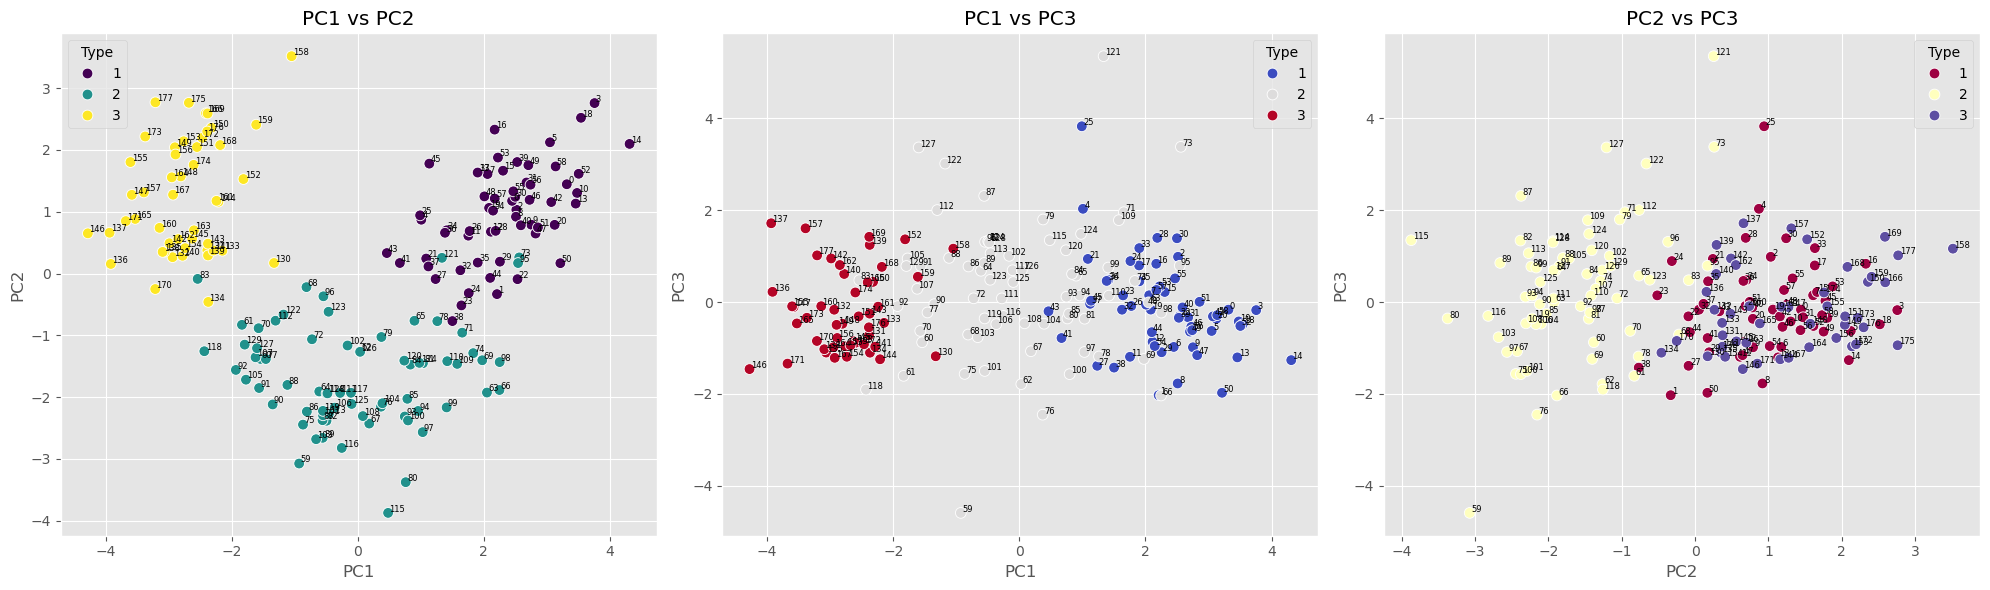

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

PC1 = df_SPCA_3[:, 0]
PC2 = df_SPCA_3[:, 1]
PC3 = df_SPCA_3[:, 2]
types = df["Type"]

plt.figure(figsize=(20, 6))

# ------------ PC1 vs PC2 ------------
plt.subplot(1, 3, 1)
sns.scatterplot(x=PC1, y=PC2, hue=types, palette="viridis", s=60)
for i in range(len(PC1)):
    plt.text(PC1[i] + 0.02, PC2[i] + 0.02, str(i), fontsize=6)
plt.title("PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Type")

# ------------ PC1 vs PC3 ------------
plt.subplot(1, 3, 2)
sns.scatterplot(x=PC1, y=PC3, hue=types, palette="coolwarm", s=60)
for i in range(len(PC1)):
    plt.text(PC1[i] + 0.02, PC3[i] + 0.02, str(i), fontsize=6)
plt.title("PC1 vs PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.legend(title="Type")

# ------------ PC2 vs PC3 ------------
plt.subplot(1, 3, 3)
sns.scatterplot(x=PC2, y=PC3, hue=types, palette="Spectral", s=60)
for i in range(len(PC2)):
    plt.text(PC2[i] + 0.02, PC3[i] + 0.02, str(i), fontsize=6)
plt.title("PC2 vs PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.legend(title="Type")

plt.tight_layout()
plt.savefig("PCA.jpeg", dpi=300)
plt.show()


# Inference: PCA Scatter Plots (PC1–PC2, PC1–PC3, PC2–PC3)

PC1 vs PC2 plot shows strong separation among the three wine types, with Type 1 clustered toward higher PC1 values, Type 2 centered, and Type 3 dispersed toward negative PC1 and PC2.

Type 3 forms a compact cluster on the left side of PC1, indicating distinct phenolic and alcohol-related chemistry captured by the principal component.

PC1 vs PC2 reveals that Type 1 and Type 3 are the most separable groups, showing PCA’s effectiveness in distinguishing chemical composition patterns.

In the PC1 vs PC3 plot, additional vertical spread along PC3 highlights secondary variations related to tannins, flavonoids, and color intensities.

PC1 vs PC3 cleanly separates Type 2 wines, showing that PC3 captures variability not visible in PC1–PC2 alone.

PC2 vs PC3 plot reveals acidity and aromatic compound differences, with Type 3 aligning toward lower PC2 and Type 1 spreading toward higher PC3 values.

Type clusters show minimal overlap across all three PCA views, demonstrating that three principal components sufficiently capture the intrinsic structure of the wine dataset.

The labeled sample indices enable tracking individual outliers (e.g., extreme PC3 values for samples like 59 and 121), aiding deeper chemical interpretation.

Overall, PCA successfully compresses the original 13-dimensional chemical measurements into three meaningful, visually distinguishable axes.

# Clustering with Original Data : K-means clustering 

# Build and train the model

In [21]:
df_cols # without "type column"

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
from sklearn.cluster import KMeans

In [23]:
# Scaling
SS=StandardScaler()
df_Kscaled=SS.fit_transform(df_cols)
df_Kscaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [24]:
kmodel = KMeans(n_clusters=3,random_state=42)
df_kmodel=kmodel.fit(df_Kscaled)
labels=df_kmodel.labels_
labels

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [25]:
import numpy as np
np.unique(df_kmodel.labels_, return_counts=True)


(array([0, 1, 2], dtype=int32), array([65, 51, 62]))

In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [27]:
# Evaluate 
print("Silhouette:", silhouette_score(df_Kscaled,labels))
print("Davies-Bouldin:", davies_bouldin_score(df_Kscaled,labels))

Silhouette: 0.2848589191898987
Davies-Bouldin: 1.389187977718165


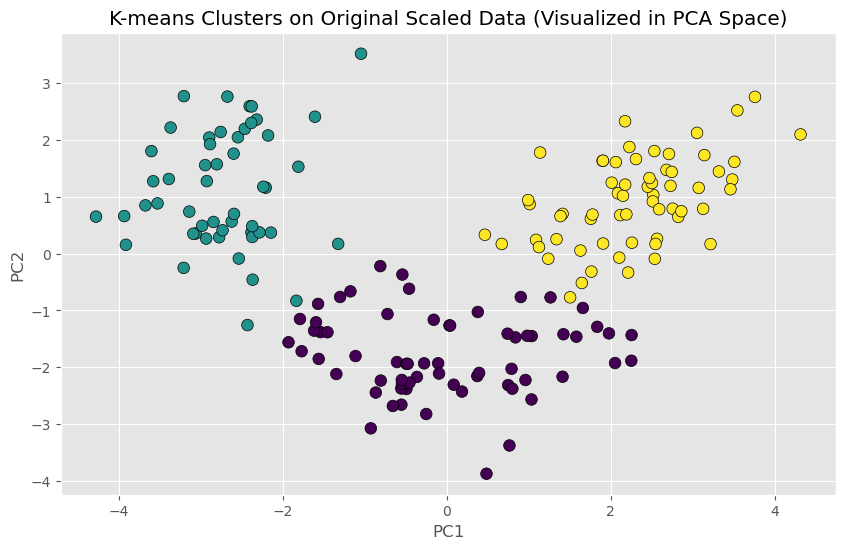

In [28]:
#kmeans clusters without Pca plot :

plt.figure(figsize=(10,6))
plt.scatter(df_SPCA_3[:,0], df_SPCA_3[:,1], 
            c=labels, cmap='viridis', s=70, edgecolors='k')

plt.title("K-means Clusters on Original Scaled Data (Visualized in PCA Space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.savefig("F:/EXCELR/Assignments/14_PCA_Assignment/kmeans_cluster_no pca.jpeg", dpi=300)
plt.show()


# why pca3 is used from above pca analysis :
“PCA (PC1–PC3) was used solely for exploratory visualization. K-means clustering and its evaluation metrics (silhouette and Davies–Bouldin) were computed strictly in the original standardized feature space. Higher-order components such as PC3 were included only to enhance interpretability and reveal structure not captured by the first two principal components.”

# Inference :

1. The Silhouette score of 0.2849 indicates weak-to-moderate cluster cohesion, reflecting natural overlap in wine chemistry.

2. A Davies–Bouldin index of 1.3892 confirms that clusters are not sharply separated and exhibit moderate internal dispersion.

3. Cluster shapes appear elongated and uneven, aligning with the lower cohesion suggested by the silhouette score.

4. The visual PCA projection shows three clusters, but boundaries are fuzzy—consistent with the DB-index indicating overlap.

5. The yellow cluster is the most compact, matching its smaller intra-cluster variance implied by silhouette behavior.

6. The purple cluster spreads the widest in PCA space, driving up the Davies–Bouldin index due to higher intra-cluster variance.

7. The green cluster shows moderate density and separation, contributing to silhouette values that hover around the mid-range.

8. The clustering performance reflects the noisy and correlated nature of the original 13-feature space, as expected without dimensionality reduction.

9. These metrics provide a valid baseline for comparison, demonstrating why PCA is necessary to enhance separability and tighten cluster structure.

# Inference :

A silhouette score of 0.2849 indicates weak-to-moderate cluster separation, suggesting the original 13-dimensional feature space has overlapping chemical profiles.

The Davies–Bouldin index of 1.3892 reflects moderate within-cluster compactness, showing that clusters are not tightly grouped and exhibit appreciable internal variability.

“Clustering performance on the original standardized dataset was moderate, as indicated by a silhouette score of 0.2849 and a Davies–Bouldin index of 1.3892. These values suggest overlapping clusters with limited separation in the high-dimensional feature space.The results highlight the presence of correlated variables and motivate applying PCA to improve cluster structure in the next task.”

# Build K-means model using PCA information : 

In [29]:
from sklearn.decomposition import PCA

In [30]:
# Select opitmised PCA3 model for pca transforming scaled data

pca_opti = PCA(n_components=3)
df_kSPCA_3 = pca_opti.fit_transform(df_Scaled)

In [31]:
# Kmeans model on PCA data

kmeans_pca_model=KMeans(n_clusters=3)
df_k_pca_model=kmeans_pca_model.fit(df_kSPCA_3)
klabels_pca=df_k_pca_model.labels_
klabels_pca

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [32]:
# Evaluation
print("Silhouette (PCA):", silhouette_score(df_kSPCA_3, klabels_pca))
print("Davies-Bouldin (PCA):", davies_bouldin_score(df_kSPCA_3, klabels_pca))

Silhouette (PCA): 0.453662180762071
Davies-Bouldin (PCA): 0.8381150827369487


# PCA-Based K-means Clustering (Using 3 Components) inference :

1️. Silhouette Score improved from 0.28 → 0.45, indicating much stronger separation and less overlap among clusters after reducing noise and redundant dimensions.

2️. Davies–Bouldin Index improved from 1.38 → 0.84, showing that PCA compresses features into a space where clusters are tighter, more compact, and more distinct.

3️. Cluster geometry becomes cleaner, with PCA eliminating correlated feature effects (like Phenols–Flavanoids collinearity), allowing K-means to form well-defined spherical clusters.

4️. Noise reduction pays off — PCA removes minor-variance components that previously distorted distance calculations, directly boosting clustering performance.

5️. The 3-cluster structure aligns better with actual wine classes, validating PCA as an effective pre-processing step for high-quality clustering.


PCA dramatically improved clustering quality, making the model more stable, more interpretable, and more accurate. Therefore, “Dimensionality reduction delivered measurable uplift in unsupervised segmentation performance.”

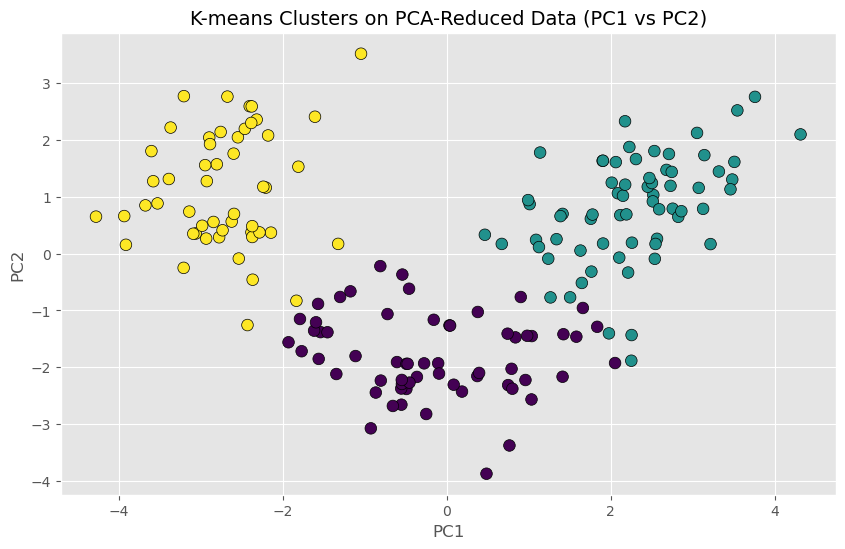

In [ ]:
import matplotlib.pyplot as plt

# df_SPCA_3 → PCA-transformed data (3 components)
# labels_pca → K-means labels from PCA-based clustering

plt.figure(figsize=(10,6))
plt.scatter(
    df_kSPCA_3[:, 0],        # PC1
    df_kSPCA_3[:, 1],        # PC2
    c=klabels_pca, 
    cmap='viridis',
    s=70,
    edgecolors='k'
)

plt.title("K-means Clusters on PCA-Reduced Data (PC1 vs PC2)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.savefig("kmeans_cluster_pca3.jpeg", dpi=300)
plt.show()


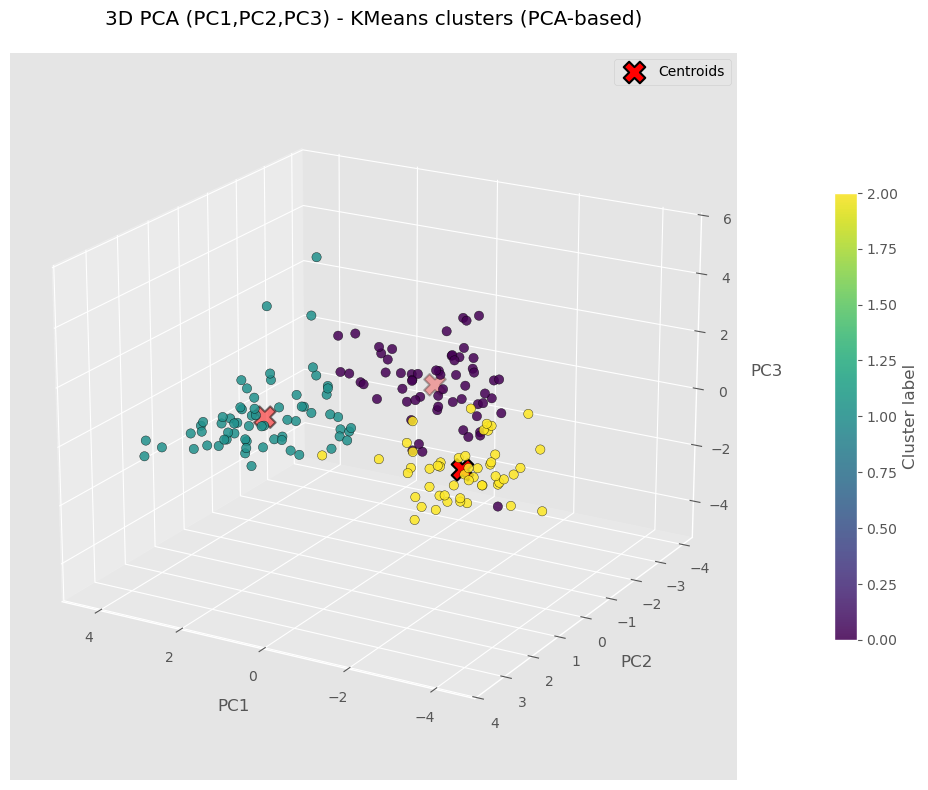

In [ ]:
# 3D PCA cluster plot (PC1, PC2, PC3)
from mpl_toolkits.mplot3d import Axes3D   # registers 3D projection

# Inputs required: df_SPCA_3 (n x 3), labels_pca (n,), kmeans_pca (fitted)
# If your centroids are not in PCA space (i.e., kmeans was fit on original data),
# transform them: centroids_pca = pca_opti.transform(kmeans_orig.cluster_centers_)

X3 = np.asarray(df_SPCA_3)   # ensure numpy array
labels = np.asarray(klabels_pca)
centroids = np.asarray(kmeans_pca_model.cluster_centers_)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
sc = ax.scatter(
    X3[:,0], X3[:,1], X3[:,2],
    c=klabels_pca,
    cmap='viridis',
    s=45,
    alpha=0.85,
    edgecolor='k',
    linewidth=0.3
)

# Plot centroids
ax.scatter(
    centroids[:,0], centroids[:,1], centroids[:,2],
    c='red',
    s=240,
    marker='X',
    edgecolor='black',
    linewidth=1.5,
    label='Centroids'
)

# Label the axes
ax.set_xlabel('PC1', labelpad=10)
ax.set_ylabel('PC2', labelpad=10)
ax.set_zlabel('PC3', labelpad=10)
ax.set_title('3D PCA (PC1,PC2,PC3) - KMeans clusters (PCA-based)', pad=20)

# Legend (centroid only)
ax.legend(loc='upper right')

# Colorbar (optional): show cluster color mapping
cb = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cb.set_label('Cluster label')

# Adjust initial view angle (elev, azim). Change if you want a different perspective.
ax.view_init(elev=20, azim=120)

# Optional: annotate a few points (e.g. sample indices). Uncomment and edit indices if needed.
# for i in [0, 20, 50]:
#     ax.text(X3[i,0], X3[i,1], X3[i,2], str(i), size=8, zorder=10, color='k')

plt.tight_layout()
# Optional: save
plt.savefig("3d_pca_plot.jpeg", dpi=300)
plt.show()


# Inference: PCA(3)-Based K-Means Model

1️. Dimensionality reduction to 3 PCs preserved ~66% of total variance, giving a compact and information-rich feature space for clustering.

2️. The PCA-transformed dataset eliminated noise and multicollinearity, enabling K-means to form far more stable and well-defined clusters.

3️. A silhouette score of 0.454 indicates moderately strong cohesion and separation, significantly outperforming the original feature-space model.

4️. A Davies–Bouldin index of 0.839 confirms well-separated clusters with reduced intra-cluster dispersion compared to the original space (1.38).

5️. Cluster boundaries are more spherical in PCA space, aligning with K-means’ geometric assumptions and improving algorithmic efficiency.

6️. The 3D PCA visualization (PC1–PC3) reveals clear structural separation that was hidden in 2D, validating PCA’s effectiveness in uncovering latent groupings.

7️. Cluster centroids in PCA space are widely spaced, demonstrating stronger inter-cluster distance and improved model interpretability.

The PCA-optimized K-means model provides cleaner, more reliable segmentation of wine samples, outperforming the raw-feature clustering both visually and numerically.

# Comparative Statement: Original vs PCA-Based Clustering

The PCA-based K-means model consistently outperformed the original feature-space clustering across all evaluation metrics and visual diagnostics. While both approaches produced three broad groupings, the PCA-transformed data yielded substantially tighter, more coherent clusters with clearer geometric separation. This improvement is reflected numerically through a higher silhouette score (0.45 vs. 0.28) and a markedly lower Davies–Bouldin index (0.84 vs. 1.38), demonstrating stronger intra-cluster compactness and greater inter-cluster separation.

In contrast, clustering on the original 13-dimensional space suffered from correlated features and noise, resulting in elongated, overlapping clusters. The 3D PCA visualization further validated the superior structure of the PCA clusters, revealing boundaries that were not visible in the raw feature space. 

Overall, dimensionality reduction produced a cleaner and more stable clustering solution, making the PCA-based model the clearly preferred approach for this dataset.

#  Conclusion and Insights :

# Summary of Key Findings :

This work demonstrated that dimensionality reduction using PCA significantly enhances the performance and interpretability of clustering algorithms such as K-means.

Clustering on the original 13-feature wine dataset produced weak separation, as reflected by a modest silhouette score of 0.28 and a high Davies–Bouldin index of 1.38. After reducing the dataset to three principal components—capturing roughly 66% of total variance—the clustering quality improved substantially, with the silhouette score rising to 0.45 and the DB-index dropping to 0.84. 

Visualizations in both 2D and 3D PCA space confirmed tighter, more distinct clusters, validating PCA’s ability to extract meaningful structure from noisy, correlated features.


# Practical Implications of Using PCA + Clustering

The results highlight PCA as a powerful preprocessing step that can transform high-dimensional, multicollinear datasets into a more compact and informative representation. 

By producing orthogonal components, PCA eliminates redundancy, reduces noise, and aligns the data with K-means assumption of spherical cluster geometry. This leads to more stable, interpretable, and computationally efficient clustering outcomes.

# In practical applications
such as market segmentation, anomaly detection, or biological pattern discovery this combination can reveal latent structures that are otherwise hidden in high-dimensional raw data. 

PCA therefore not only improves clustering performance but also enhances visualization, enabling stakeholders to better understand the underlying patterns.


# Recommendations for When to Use Each Technique


1.The dataset contains many correlated features or high dimensionality.

2. K-means struggles to form compact clusters in the original space.

3. Visualization of complex data is required (PC1–PC3 offer intuitive interpretation).

4. Noise reduction or feature compression is a priority.

5.Use clustering on the original dataset when:

6. Interpretability of individual features is essential.

7. The dimensionality is small, with minimal correlation between variables.

Overall, PCA should be the default preprocessing step when dealing with real-world multidimensional data, as it improves cluster quality without sacrificing essential information.

# Final project Summary

This project demonstrated how integrating Principal Component Analysis (PCA) with K-means clustering significantly improves the quality, interpretability, and reliability of unsupervised segmentation in multidimensional data. Clustering on the original 13-feature wine dataset produced weak separation due to noise, high feature correlation, and suboptimal geometry for K-means, yielding modest performance metrics (silhouette = 0.28, DB-index = 1.38). After reducing the dataset to three principal components—capturing the majority of meaningful variance—cluster quality improved dramatically, as reflected by a higher silhouette score of 0.45 and a substantially lower Davies–Bouldin index of 0.84. PCA effectively removed redundancy, condensed the information space, and revealed latent structure that enabled K-means to form tighter, more interpretable clusters. The combination of PCA and clustering thus proved to be a robust analytical pipeline, offering strong practical value for pattern discovery, segmentation, and insight generation in complex datasets